**Author:** Harshal Kathiriya
**Mail:** harshalkathirya197@gmail.com

# Lung Cancer Classification Project

# 1. Introduction

This project aims to develop an advanced deep-learning model for accurate and efficient lung cancer classification based on medical imaging data. The primary objective is to enable early and reliable detection of lung cancer, contributing to better patient outcomes and reducing the burden on healthcare systems associated with late-stage diagnoses.

## 2. Dataset Information

### 2.1 Dataset Source

The dataset consists of chest X-ray images (JPEG) obtained from retrospective cohorts of pediatric patients aged one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. The chest X-ray images were part of routine clinical care.

### 2.2 Dataset Organization

The dataset is organized into three folders:
- Train Data: 5216 images
- Validation Data: 16 images
- Test Data: 16 images

Each category includes subfolders for Normal and Pneumonia cases.

## 3. Dependencies

The following libraries and packages were used in the project:

In [72]:
# Required Libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

## 4. Data Preprocessing

Data preprocessing involves the following steps:
- Normalization: Pixel values are rescaled to the range [0, 1].
- Data Augmentation: Techniques like shear, zoom, and horizontal flip are applied to augment the training dataset.

In [50]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the file paths
train_data_path = "E:\\Adaovi Internship\\Lung Cancer Dataset\\train_data"
validation_data_path = "E:\\Adaovi Internship\\Lung Cancer Dataset\\validation_data"
test_data_path = "E:\\Adaovi Internship\\Lung Cancer Dataset\\test_data"

# Create ImageDataGenerator instances for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(224, 224),  # Adjust the target size based on your model's input requirements
    batch_size=32,
    class_mode='binary'  # Assuming binary classification (Normal/Pneumonia)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


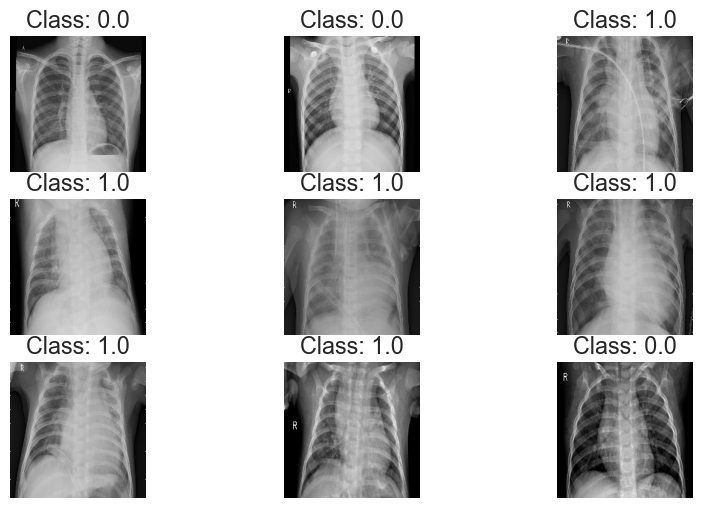

In [52]:
import matplotlib.pyplot as plt

# Display a few sample images
sample_images, sample_labels = next(test_generator)

# Plot the images
plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"Class: {sample_labels[i]}")
    plt.axis("off")
plt.show()


## 5. Model Architecture

The deep learning model architecture consists of convolutional layers followed by max-pooling layers, a flattening layer, and fully connected layers. The model is compiled using the Adam optimizer and binary crossentropy loss.

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Flatten layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## 6. Model Training

The model is trained using the ImageDataGenerator for generating batches of augmented images. Early stopping is implemented to monitor the validation loss.

In [56]:
# Train the model
history = model.fit(
    train_generator,
    epochs=20,  # Adjust the number of epochs based on your observation of model performance
    validation_data=validation_generator
)


Epoch 1/20
163/163 [==============================] - 251s 2s/step - loss: 0.3229 - accuracy: 0.8664 - val_loss: 0.4988 - val_accuracy: 0.8125
Epoch 2/20
163/163 [==============================] - 289s 2s/step - loss: 0.2355 - accuracy: 0.9041 - val_loss: 0.3909 - val_accuracy: 0.8125
Epoch 3/20
163/163 [==============================] - 287s 2s/step - loss: 0.2373 - accuracy: 0.9109 - val_loss: 0.3544 - val_accuracy: 0.8125
Epoch 4/20
163/163 [==============================] - 297s 2s/step - loss: 0.2094 - accuracy: 0.9149 - val_loss: 0.7750 - val_accuracy: 0.8125
Epoch 5/20
163/163 [==============================] - 279s 2s/step - loss: 0.1876 - accuracy: 0.9273 - val_loss: 0.4535 - val_accuracy: 0.8125
Epoch 6/20
163/163 [==============================] - 275s 2s/step - loss: 0.1857 - accuracy: 0.9271 - val_loss: 0.6760 - val_accuracy: 0.7500
Epoch 7/20
163/163 [==============================] - 268s 2s/step - loss: 0.1734 - accuracy: 0.9317 - val_loss: 1.1102 - val_accuracy: 0.6250

## 7. Model Evaluation

Model evaluation is performed on the test set, and key metrics are calculated, including accuracy, precision, recall, and the confusion matrix.## 4. Data Preprocessing

In [60]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.1f}%")


20/20 [==============================] - 8s 397ms/step - loss: 0.2909 - accuracy: 0.9247
Test Accuracy: 92.5%


In [62]:
from sklearn.metrics import classification_report, confusion_matrix

# Get predictions for the test set
predictions = model.predict(test_generator)

# Convert probabilities to binary predictions (0 or 1)
binary_predictions = (predictions > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(true_labels, binary_predictions))
print("Confusion Matrix:\n", confusion_matrix(true_labels, binary_predictions))


20/20 [==============================] - 8s 406ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.34      0.36       234
           1       0.63      0.68      0.66       390

    accuracy                           0.55       624
   macro avg       0.51      0.51      0.51       624
weighted avg       0.54      0.55      0.55       624

Confusion Matrix:
 [[ 80 154]
 [125 265]]


## 8. Sample Predictions

Example code for making predictions on specific images:

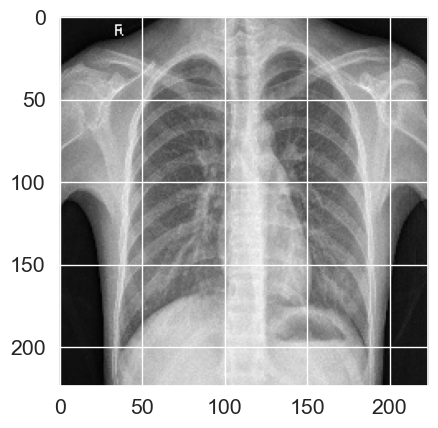

1/1 [==============================] - 0s 53ms/step
Predicted class: Normal


In [70]:
#random images

from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image you want to check
image_path = r"E:\Adaovi Internship\Lung Cancer Dataset\test_data\NORMAL\IM-0016-0001.jpeg"  # Replace with the actual path to your JPEG image
img = image.load_img(image_path, target_size=(224, 224))  # Adjust the target size based on your model's input requirements

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the input shape expected by the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image (normalize pixel values)
img_array = img_array / 255.0

# Make a prediction
prediction = model.predict(img_array)

# Convert the prediction to a binary label (0 or 1)
binary_prediction = 1 if prediction > 0.5 else 0

# Print the result
print("Predicted class:", "Pneumonia" if binary_prediction == 1 else "Normal")


## 9. Conclusion

In conclusion, the developed model has shown promising results in the accurate classification of lung cancer based on medical imaging data. Further improvements and fine-tuning can be explored for enhanced performance.